In [1]:
#analytics
import pandas as pd
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from entropy_python_library.entropy.entropy import *
import mass_ts as mts
from scipy.io import arff

import stumpy
# visuals
import matplotlib.pyplot as plt

/Users/tortysivill/.pyenv/versions/3.7.3/envs/entropy/lib/python3.7/site-packages/mass_ts/_mass_ts.py:18: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  'GPU support will not work. You must pip install mass-ts[gpu].')


In [2]:
import complexityparameters

## Import Condition Data

In [3]:
path = "data/useful/Chinatown/"

In [4]:
data = arff.loadarff(path+'Chinatown_TEST.arff')
print(len(data))
df_data = pd.DataFrame(data[0])

df_data.shape

df_data.head()

2


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att16,att17,att18,att19,att20,att21,att22,att23,att24,target
0,501.0,328.0,195.0,218.0,67.0,17.0,28.0,72.0,132.0,215.0,...,1238.0,1107.0,1190.0,1255.0,1144.0,905.0,690.0,386.0,192.0,b'1'
1,880.0,752.0,913.0,863.0,402.0,112.0,60.0,112.0,119.0,186.0,...,1063.0,1009.0,1025.0,1089.0,979.0,706.0,585.0,356.0,187.0,b'1'
2,493.0,389.0,174.0,121.0,82.0,36.0,27.0,64.0,127.0,203.0,...,1295.0,1265.0,1430.0,1637.0,1697.0,1456.0,1319.0,1179.0,848.0,b'1'
3,616.0,323.0,162.0,166.0,68.0,26.0,34.0,68.0,123.0,263.0,...,1728.0,1568.0,1439.0,1431.0,1282.0,1078.0,857.0,498.0,248.0,b'1'
4,389.0,276.0,161.0,124.0,35.0,26.0,51.0,75.0,71.0,126.0,...,993.0,819.0,879.0,998.0,1057.0,1014.0,987.0,836.0,680.0,b'1'


In [5]:
Xtrain = df_data.drop(columns=['target']).values
ytrain = df_data['target']

In [6]:
training_data_raw = Xtrain.copy()
y = ytrain.copy()

In [7]:
len(training_data_raw)

343

In [8]:
len(training_data_raw[0])

24

In [9]:
count = 0
for item in y:
    if item == b'1':
        count = count + 1
        
print(count)

94


In [10]:
y

0      b'1'
1      b'1'
2      b'1'
3      b'1'
4      b'1'
       ... 
338    b'2'
339    b'2'
340    b'2'
341    b'2'
342    b'2'
Name: target, Length: 343, dtype: object

In [11]:
temp_y = []
for value in y:
    if value == b'1':
        temp_y.append(0)
    else:
        temp_y.append(1)
        
y = temp_y

In [12]:
def normalise(X):
    return [(x - min(X))/(max(X)-min(X)) for x in X]

## Import Control Data

### Extracting the following features from selected data

<ol>
<li>Mean Activity Level</li>
<li>Standard Deviation</li>
<li> Trimmed Mean </li>
</ol>

## Aggregate Features

## Parameter Suite

In [13]:
training_data_raw = Xtrain

In [14]:
normalised_complexity_feature_df = complexityparameters.normalised_complexity_features(training_data_raw)

In [15]:
normalised_summary_feature_df = complexityparameters.normalised_summary_features(training_data_raw)

In [16]:
normalised_all_feature_df = complexityparameters.normalised_all_features(training_data_raw)

In [17]:
normalised_summary_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
normalised_summary_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])
#normalised_summary_feature_df['complexity_feature'] = get_features(12, 2)

### Models 

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


classifiers = [
    KNeighborsClassifier(1),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


### results from each complexity parameter and all summary features

In [18]:
from sklearn.ensemble import RandomForestClassifier

temp_summary_feature_df = normalised_summary_feature_df.copy()

rfc = RandomForestClassifier()
print(rfc)
for column in normalised_complexity_feature_df:
    temp_summary_feature_df['complexity_feature'] = normalised_complexity_feature_df[[column]]
    X = temp_summary_feature_df.dropna(axis='columns').values
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(column)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))


RandomForestClassifier()
lempel_ziv
[0.94436975]
[0.94583195]
[0.93857143]
[0.94717165]
[0.03092574]
[0.03217239]
[0.03358707]
[0.02936963]
approx
[0.94436975]
[0.9408664]
[0.94731092]
[0.94397845]
[0.03092574]
[0.03484832]
[0.03447437]
[0.03135387]
sample
[0.95613445]
[0.94943139]
[0.94142857]
[0.94960522]
[0.02725541]
[0.03524505]
[0.035015]
[0.03853205]
permutation
[0.94445378]
[0.93969507]
[0.94739496]
[0.94427564]
[0.03084034]
[0.04253825]
[0.02892563]
[0.02820123]
spectral
[0.94731092]
[0.94366618]
[0.94445378]
[0.94427564]
[0.03186647]
[0.03094034]
[0.03352815]
[0.02820123]
skewness
[0.95310924]
[0.95283698]
[0.94436975]
[0.95286212]
[0.03009483]
[0.02986255]
[0.03092574]
[0.03062064]
kurtosis
[0.94151261]
[0.94894883]
[0.94151261]
[0.94116145]
[0.03494667]
[0.03322579]
[0.02958461]
[0.03003157]
SVD
[0.9502521]
[0.94894883]
[0.94731092]
[0.94359725]
[0.02666873]
[0.03322579]
[0.03186647]
[0.0372851]


### Results from ALL features

In [20]:
from sklearn.ensemble import RandomForestClassifier

temp_all_feature_df = normalised_all_feature_df.copy()
temp_all_feature_df['mean'] = normalise([np.mean(instance) for instance in training_data_raw])
temp_all_feature_df['std'] = normalise([np.std(instance) for instance in training_data_raw])

X = temp_all_feature_df.dropna(axis='columns').values
rfc = RandomForestClassifier()
print(rfc)
accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.95613445]
[0.95866809]
[0.95605042]
[0.95921868]
[0.03010187]
[0.0295359]
[0.03548776]
[0.02334324]


### Dont want all features - curse of dimensionality and not very intepretable - lets try and think more about our features

In [21]:
import seaborn as sn

#### lets plot correlation for the complexity features

In [22]:
corrMatrix = normalised_complexity_feature_df.corr()

#### visualise correlation matrix

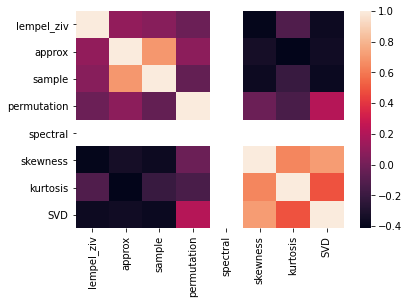

In [23]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [24]:
### lets plot correlation for the summary features (first half)

In [25]:
corrMatrix = normalised_summary_feature_df.iloc[:, 0:10].corr()

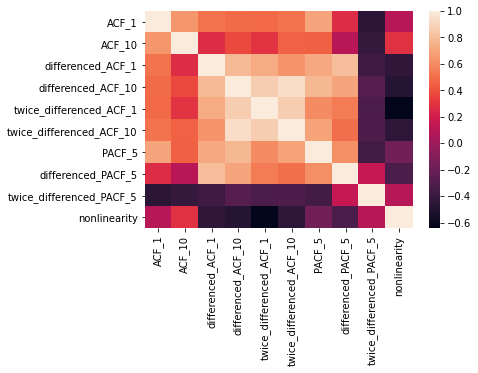

In [26]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

#### lets plot correlation for the summary features (second half)

In [27]:
corrMatrix = normalised_summary_feature_df.iloc[:, 10:].corr()

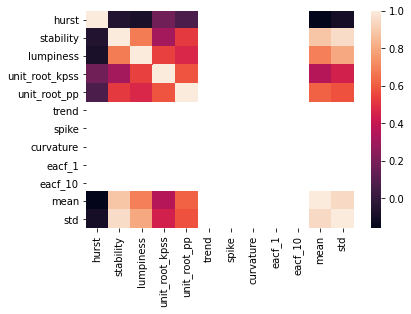

In [28]:
sn.heatmap(corrMatrix, annot=False)
plt.show()

In [29]:
#### lets plot correlation for the summary features (second half)

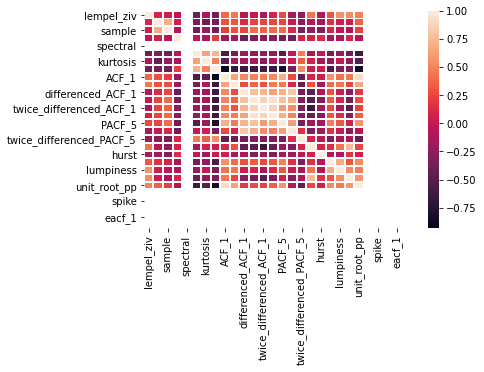

In [30]:
corrMatrix = normalised_all_feature_df.corr()
sn.heatmap(corrMatrix, annot=False, linewidths=1.)
plt.savefig('correlation_matrix.eps')
plt.show()

### Feature Importances

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

model = RandomForestClassifier().fit(X_train, y_train)
print(model.score(X_val, y_val))

0.9651162790697675


### Permutation Feature Importance

In [32]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

Depresjon_feature_names = temp_all_feature_df.dropna(axis='columns').columns
for i in r.importances_mean.argsort()[::-1]:
    print(f"{Depresjon_feature_names[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

sample  0.015 +/- 0.008
PACF_5  0.012 +/- 0.011
skewness0.011 +/- 0.006
nonlinearity0.010 +/- 0.008
unit_root_kpss0.009 +/- 0.008
mean    0.008 +/- 0.010
twice_differenced_ACF_100.007 +/- 0.008
stability0.002 +/- 0.004
differenced_ACF_100.001 +/- 0.006
twice_differenced_PACF_50.000 +/- 0.002
std     0.000 +/- 0.000
ACF_1   0.000 +/- 0.000
approx  0.000 +/- 0.000
kurtosis0.000 +/- 0.000
SVD     0.000 +/- 0.000
lempel_ziv0.000 +/- 0.000
ACF_10  0.000 +/- 0.000
differenced_PACF_50.000 +/- 0.000
lumpiness0.000 +/- 0.000
unit_root_pp0.000 +/- 0.000
permutation-0.003 +/- 0.005
differenced_ACF_1-0.003 +/- 0.005
twice_differenced_ACF_1-0.007 +/- 0.007


### LIME

21-Feb-27 08:21:51 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.
21-Feb-27 08:21:52 fatf.transparency.predictions.surrogate_explainers INFO     Selecting 23 features with highest weights.


{'condition': {'*lempel_ziv* <= 0.50': -0.023298586724703443, '0.47 < *approx*': -0.018565534761480054, '0.25 < *sample*': 0.11530969914841788, '0.76 < *permutation*': -0.028897241460270562, '0.51 < *skewness* <= 0.61': -0.044712484562687914, '*kurtosis* <= 0.21': 0.00197138790071387, '0.64 < *SVD*': -0.03093395822729811, '*ACF_1* <= 0.52': 0.011687578976532723, '*ACF_10* <= 0.34': 0.053062925325963455, '0.65 < *differenced_ACF_1* <= 0.73': 0.016092631211471906, '0.19 < *differenced_ACF_10* <= 0.29': 0.0011055369621433297, '0.36 < *twice_differenced_ACF_1* <= 0.46': -0.03762499895214157, '*twice_differenced_ACF_10* <= 0.21': 0.003758637944605159, '0.25 < *PACF_5* <= 0.34': -0.08538253321818735, '0.25 < *differenced_PACF_5* <= 0.34': 0.04645727005570967, '0.27 < *twice_differenced_PACF_5* <= 0.36': -0.016903489273779736, '0.23 < *nonlinearity* <= 0.35': -0.07249757880612742, '0.27 < *stability* <= 0.34': -0.011286416952120314, '0.10 < *lumpiness* <= 0.18': 0.0035375961700295157, '0.64 <

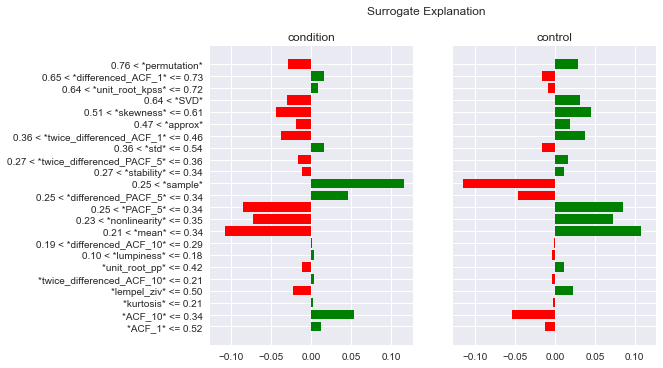

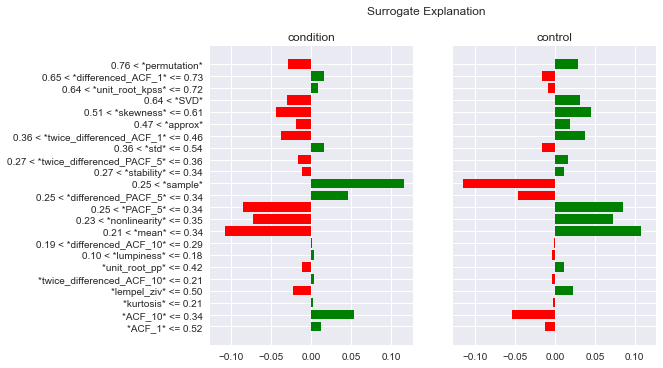

In [33]:
import fatf.transparency.predictions.surrogate_explainers as fatf_surrogates
import fatf.vis.lime as fatf_vis_lime

Depresjon_class_names = ['condition','control']
lime = fatf_surrogates.TabularBlimeyLime(
    X_train,
    model,
    feature_names=list(Depresjon_feature_names),
    class_names=Depresjon_class_names)

# Choose an index of the instance to be explained
index_to_explain = 0

# Explain an instance
lime_explanation = lime.explain_instance(
    X_train[index_to_explain, :], samples_number=50)

# Display the textual explanation
print(lime_explanation)

# Plot the explanation
fatf_vis_lime.plot_lime(lime_explanation)

In [34]:
### SHAP

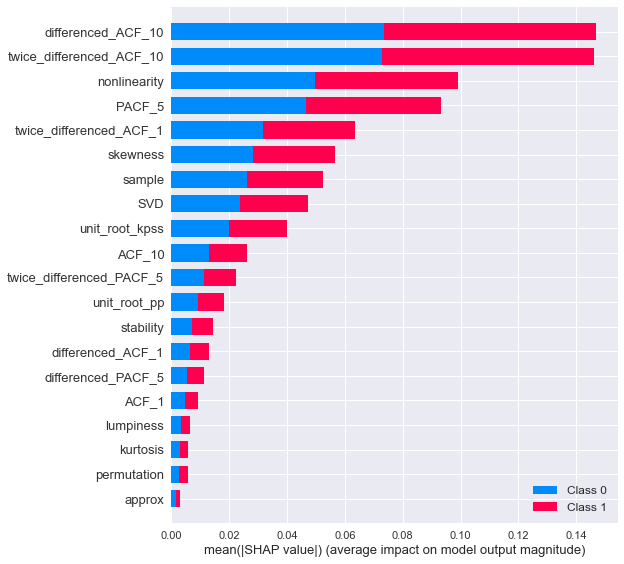

In [35]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(normalised_all_feature_df.dropna(axis='columns').values, y)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(normalised_all_feature_df.dropna(axis='columns').values)
shap.summary_plot(shap_values, normalised_all_feature_df.dropna(axis='columns').values, normalised_all_feature_df.dropna(axis='columns').columns )

In [36]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(normalised_all_feature_df.dropna(axis='columns').columns,vals)),columns=['col_name','feature_importance_vals'])

feature_importance['feature_importance_mean'] = np.mean(feature_importance['feature_importance_vals'])

feature_importance.sort_values(by=['feature_importance_mean'],ascending=False,inplace=True)
feature_importance.head()


top_5_features = feature_importance['col_name'][0:5].values
top_10_features = feature_importance['col_name'][0:10].values
top_15_features = feature_importance['col_name'][0:15].values
top_20_features = feature_importance['col_name'][0:20].values
top_25_features = feature_importance['col_name'][0:25].values
all_features = feature_importance['col_name'].values

feature_combinations = [top_5_features, top_10_features, top_15_features, top_20_features, top_25_features, all_features]

In [37]:
### Top Features Results

In [40]:
from sklearn.ensemble import RandomForestClassifier


rfc = QuadraticDiscriminantAnalysis()

for feature_combination in feature_combinations:
    temp_summary_feature_df = normalised_all_feature_df.copy()
    X = temp_summary_feature_df[feature_combination].values
    #top 10 features
    #X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    F1_scores = []

    accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
    precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
    recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
    F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

    print(feature_combination)
    print(np.mean(accuracy_scores,axis=1))
    print(np.mean(precision_scores,axis=1))
    print(np.mean(recall_scores,axis=1))
    print(np.mean(F1_scores,axis=1))


    print(np.std(accuracy_scores,axis=1))
    print(np.std(precision_scores,axis=1))
    print(np.std(recall_scores,axis=1))
    print(np.std(F1_scores,axis=1))

['differenced_ACF_10' 'nonlinearity' 'twice_differenced_ACF_10' 'PACF_5'
 'skewness']
[0.93285714]
[0.93501956]
[0.93285714]
[0.93290679]
[0.04304695]
[0.04416299]
[0.04304695]
[0.04349473]
['differenced_ACF_10' 'nonlinearity' 'twice_differenced_ACF_10' 'PACF_5'
 'skewness' 'twice_differenced_ACF_1' 'SVD' 'unit_root_kpss' 'sample'
 'ACF_10']
[0.9502521]
[0.9544802]
[0.9502521]
[0.95099523]
[0.02298838]
[0.02185156]
[0.02298838]
[0.02263458]
['differenced_ACF_10' 'nonlinearity' 'twice_differenced_ACF_10' 'PACF_5'
 'skewness' 'twice_differenced_ACF_1' 'SVD' 'unit_root_kpss' 'sample'
 'ACF_10' 'twice_differenced_PACF_5' 'unit_root_pp' 'differenced_ACF_1'
 'stability' 'differenced_PACF_5']
[0.95605042]
[0.96239158]
[0.95605042]
[0.95698124]
[0.0238189]
[0.01869329]
[0.0238189]
[0.02290324]
['differenced_ACF_10' 'nonlinearity' 'twice_differenced_ACF_10' 'PACF_5'
 'skewness' 'twice_differenced_ACF_1' 'SVD' 'unit_root_kpss' 'sample'
 'ACF_10' 'twice_differenced_PACF_5' 'unit_root_pp' 'differe

In [41]:
## Just summary features results 

In [42]:
from sklearn.ensemble import RandomForestClassifier


rfc = QuadraticDiscriminantAnalysis()

temp_summary_feature_df = normalised_summary_feature_df.copy()
X = temp_summary_feature_df.dropna(axis='columns').values
#top 10 features
#X = temp_summary_feature_df[['complexity_feature', 'trend', 'unit_root_kpss', 'mean', 'eacf_10', 'std', 'ACF_10', 'curvature', 'twice_differenced_ACF_10', 'stability', 'spike']].values

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []

accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))

print(feature_combination)
print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

['differenced_ACF_10' 'nonlinearity' 'twice_differenced_ACF_10' 'PACF_5'
 'skewness' 'twice_differenced_ACF_1' 'SVD' 'unit_root_kpss' 'sample'
 'ACF_10' 'twice_differenced_PACF_5' 'unit_root_pp' 'differenced_ACF_1'
 'stability' 'differenced_PACF_5' 'ACF_1' 'permutation' 'lumpiness'
 'kurtosis' 'approx' 'lempel_ziv']
[0.96781513]
[0.97174815]
[0.96781513]
[0.9684229]
[0.02445378]
[0.02136382]
[0.02445378]
[0.02394922]


In [53]:
temp_summary_feature_df = normalised_summary_feature_df.copy()

X = temp_summary_feature_df.dropna(axis='columns')
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

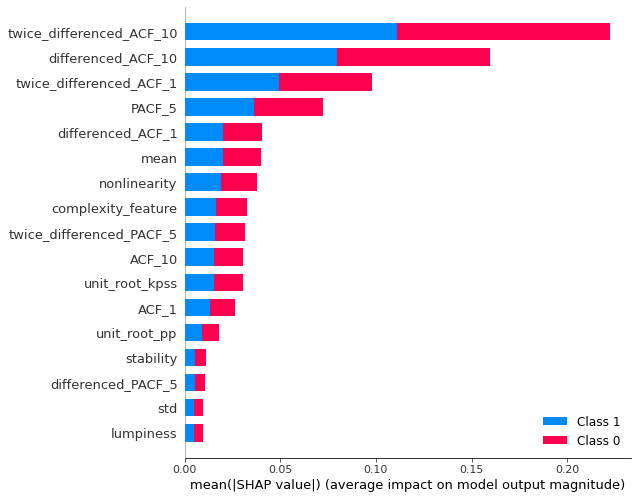

In [54]:
import shap
shap.initjs()

model = RandomForestClassifier().fit(X_val.values, y_val)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val.values)
shap.summary_plot(shap_values, X_val.values, normalised_summary_feature_df.dropna(axis='columns').columns )

In [56]:

X_selected = X_train[['complexity_feature','twice_differenced_ACF_10','differenced_ACF_10','twice_differenced_ACF_10','PACF_5']]


rfc = RandomForestClassifier()

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X_selected, y_train, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))

[0.92630769]
[0.93354274]
[0.93030769]
[0.92572349]
[0.04675734]
[0.05131764]
[0.05098811]
[0.04693318]


### My Features

In [19]:
window_size_parameter = 12

In [20]:
def DP_entropy(x,window): 
    time_series = np.array(x,dtype=float)
    matrix_profile = stumpy.stump(time_series, m=window)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy = -np.sum([(x/distance_sum)*np.log(x/distance_sum) for x in df_matrix_profile['distances']])
    return entropy

In [21]:
from scipy import signal

def DP_flatness_motif(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:10]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    #entropy = entropy/(distance_sum/len(top_motifs['distances']))
    return entropy

In [22]:
from scipy import signal

def DP_flatness(x,window):
    time_series = np.array(x,dtype=float)
    my_window = len(time_series) - window
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')
    distance_sum = np.sum(df_matrix_profile['distances'])
    entropy_sum = np.sum([np.log(x) for x in df_matrix_profile['distances']])
    entropy = entropy_sum * 1/len(df_matrix_profile['distances'])
    entropy = np.exp(entropy)
    entropy = entropy/(distance_sum/len(df_matrix_profile['distances']))
    return entropy

In [23]:
def sequential_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= matrix_profile[:,0]
    df_matrix_profile['left_index']= matrix_profile[:,1]
    a_s = len(df_matrix_profile.index)
    for x in range(0,len(df_matrix_profile.index)-1):
        if df_matrix_profile['left_index'].iloc[x+1] == df_matrix_profile['left_index'].iloc[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [24]:
from scipy.stats import skew
from scipy.stats import kurtosis

def get_features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    return normalise(entropy_feature)
   #return(temp_summary_feature_df[['complexity_feature', 'mean', 'std']].values)


In [25]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_entropy(x, window))
        elif feature == 3:
            entropy_feature.append(DP_flatness_motif(x,window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    return temp_summary_feature_df[['complexity_feature','twice_differenced_ACF_10','differenced_ACF_10','twice_differenced_ACF_10','PACF_5']].values
    #return(temp_summary_feature_df.dropna(axis='columns').values)



In [26]:
## Results for DP Entropy

In [27]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.91806723]
[0.92534029]
[0.92394958]
[0.92380103]
[0.03909189]
[0.042856]
[0.04201723]
[0.03803322]


In [28]:
### Results for DP Flatness

In [29]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier


X = features(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.92403361]
[0.93731921]
[0.93277311]
[0.92350444]
[0.04378498]
[0.03150576]
[0.03224964]
[0.03538832]


In [30]:
### Results for Sequential Entropy

In [31]:
import statsmodels.api as sm
#y = np.asarray([1 for x in range(0,len(condition))] + [0 for x in range(0,len(control))])

from sklearn.ensemble import RandomForestClassifier

X = features(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
print(rfc)


accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


RandomForestClassifier()
[0.91226891]
[0.93036007]
[0.91529412]
[0.91706448]
[0.03523244]
[0.04479689]
[0.03600485]
[0.04712669]


In [32]:

def calculate_DP(x):
    matrix_profile_A = stumpy.stump(x, m=5)
    matrix_profile_B = stumpy.stump(x, m=8)
    matrix_profile_C = stumpy.stump(x, m=12)
    matrix_profile_D = stumpy.stump(x, m=15)
    
    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)

    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        distance_profile.append(np.max([A_vary, B_vary, C_vary, D_vary])**2)
    return(distance_profile)


In [33]:
from scipy import signal

def DP_split_flatness(x,window):
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    top_motifs = df_matrix_profile.sort_values(by='distances')[0:20]
    distance_sum = np.sum(top_motifs['distances'])
    entropy_sum = np.sum([np.log(x) for x in top_motifs['distances']])
    entropy = entropy_sum * 1/len(top_motifs['distances'])
    entropy = np.exp(entropy)
    return entropy

In [48]:
from scipy import signal

def DP_split_entropy(x,window):
    bins = 2
    time_series = np.array(x,dtype=float)
    df_matrix_profile = pd.DataFrame()
    df_matrix_profile['distances']= calculate_DP(time_series)
    #df_matrix_profile['indexes']= df_matrix_profile.index
    distance_sum = np.sum(df_matrix_profile['distances'])
    total = len(df_matrix_profile['distances'])
    df_matrix_profile.dropna()
    categorical_object = pd.cut(df_matrix_profile['distances'], bins)
    counts = []
    for bini in range(0,bins):
        counts.append(categorical_object.value_counts().values[bini]/total)
    entropy = -np.sum([(c)*np.log(c) for c in counts])
    return entropy
    return entropy

In [59]:
def calculate_DP_Sequential(x):
    matrix_profile_A = stumpy.stump(x, m=7)
    matrix_profile_B = stumpy.stump(x, m=8)
    matrix_profile_C = stumpy.stump(x, m=6)
    matrix_profile_D = stumpy.stump(x, m=9)

    matrix_profiles = zip(matrix_profile_A, matrix_profile_B, matrix_profile_C, matrix_profile_D)
    
    distance_profile = []
    A_mean = np.mean(matrix_profile_A[:,0])
    B_mean = np.mean(matrix_profile_B[:,0])
    C_mean = np.mean(matrix_profile_C[:,0])
    D_mean= np.mean(matrix_profile_D[:,0])
    
    for A,B,C,D in matrix_profiles:
        A_vary = A_mean - A[0]
        B_vary = B_mean - B[0]
        C_vary = C_mean - C[0]
        D_vary = D_mean - D[0]
        highest_index = np.argmax([A_vary, B_vary, C_vary, D_vary])
        if highest_index == 0:
            distance_profile.append(A[1])
        elif highest_index == 1:
            distance_profile.append(B[1])
        elif highest_index == 2:
            distance_profile.append(C[1])
        elif highest_index == 3:
            distance_profile.append(D[1]) 
    return(distance_profile)

In [60]:
def sequential_split_entropy(x,window):
    yes = 0
    time_series = np.array(x,dtype=float)
    window_size = window # Approximately, how many data points might be found in a pattern
    matrix_profile = stumpy.stump(time_series, m=window_size)
    neighbour_indexes = calculate_DP_Sequential(time_series)
  
    a_s = len(neighbour_indexes)
    for x in range(0,len(neighbour_indexes)-1):
        if neighbour_indexes[x+1] == neighbour_indexes[x] + 1:
            yes = yes + 1
    return np.log(a_s) - np.log(yes)

In [61]:
from scipy.stats import skew
from scipy.stats import kurtosis

def features2(window, feature):
    entropy_feature = []
    
    
    for x in training_data_raw:
        if feature == 0:
            entropy_feature.append(DP_split_entropy(x, window))
        elif feature == 1:
            entropy_feature.append(DP_split_flatness(x, window))
        elif feature == 2:
            entropy_feature.append(sequential_split_entropy(x, window))
    
    temp_summary_feature_df = normalised_summary_feature_df.copy()
    temp_summary_feature_df['complexity_feature'] = normalise(entropy_feature)
    #return(temp_summary_feature_df.dropna(axis='columns').values)
    #return(temp_summary_feature_df[['complexity_feature','mean','std']].values)
    return temp_summary_feature_df[['complexity_feature','twice_differenced_ACF_10','differenced_ACF_10','twice_differenced_ACF_10','PACF_5']].values




In [52]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,0) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.92092437]
[0.92215402]
[0.91806723]
[0.91725322]
[0.03974968]
[0.03719882]
[0.03681257]
[0.04086363]


In [53]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,1) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.93571429]
[0.93815855]
[0.94159664]
[0.93734308]
[0.04312038]
[0.03705587]
[0.04346293]
[0.04279723]


In [62]:
import statsmodels.api as sm

from sklearn.ensemble import RandomForestClassifier

X = features2(window_size_parameter,2) #2400 #up to 2500
rfc = RandomForestClassifier()
    

accuracy_scores = []
precision_scores = []
recall_scores = []
F1_scores = []


accuracy_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='accuracy'))
precision_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='precision_weighted'))
recall_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='recall_weighted'))
F1_scores.append(cross_val_score(rfc, X, y, cv=10, scoring='f1_weighted'))


print(np.mean(accuracy_scores,axis=1))
print(np.mean(precision_scores,axis=1))
print(np.mean(recall_scores,axis=1))
print(np.mean(F1_scores,axis=1))


print(np.std(accuracy_scores,axis=1))
print(np.std(precision_scores,axis=1))
print(np.std(recall_scores,axis=1))
print(np.std(F1_scores,axis=1))


[0.92983193]
[0.92819194]
[0.93277311]
[0.92027024]
[0.03984337]
[0.03925336]
[0.03948507]
[0.04127858]
